In [20]:
# mathimical operations
import numpy as np
# loding and cleaning csv data
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error,r2_score

# saving my advertising data and save it into data(variable) which is basically pandas dataframe
data = pd.read_csv("Advertising.csv")
# head prints the top 5 rows of my data
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [21]:
# now we analyze data before training
# it will show how  many rows and colums we have in our data
data.shape
# shows data type of our data
data.info
# we get insight of our data i.e. we get mean, median(50% of our data), max.
data.describe
data.columns


Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [22]:
data.shape

(200, 5)

In [23]:
data.info


<bound method DataFrame.info of      Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [24]:
data.describe

<bound method NDFrame.describe of      Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [25]:
data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [26]:
import matplotlib.pyplot as plt
# draw graph advance
import seaborn as sns


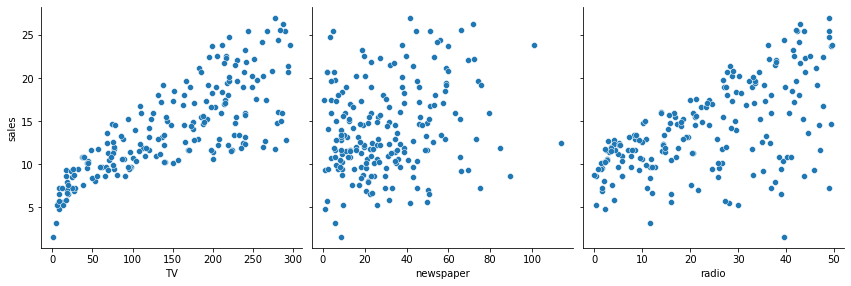

In [27]:
sns.pairplot(data, x_vars=['TV','newspaper','radio'], y_vars='sales',size=4, aspect=1, kind='scatter')

<AxesSubplot:>

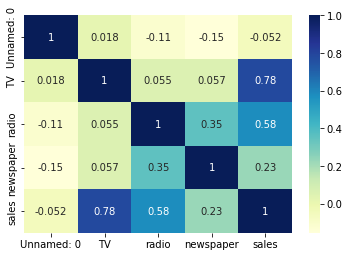

In [31]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True )

In [32]:
X = data['TV']
y = data['sales']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [35]:
X_train.head()


74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [36]:
y_train.head()

74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
Name: sales, dtype: float64

In [37]:
from sklearn.linear_model import LinearRegression
# or
import statsmodels.api as sm


In [38]:
X_train_sm = sm.add_constant(X_train)  # adding constant to get intercept

In [39]:
lr = sm.OLS(y_train, X_train_sm).fit()

In [40]:
lr.params

const    6.989666
TV       0.046497
dtype: float64

In [41]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     219.0
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           2.84e-30
Time:                        23:21:29   Log-Likelihood:                -370.62
No. Observations:                 140   AIC:                             745.2
Df Residuals:                     138   BIC:                             751.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9897      0.548     12.762      0.0